In [1]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import keras
print('keras using %s backend'%keras.backend.backend())
import pandas as pd
import numpy as np
import matplotlib.pyplot as graph
import sklearn
%matplotlib inline
graph.rcParams['figure.figsize'] = (15,5)
graph.rcParams["font.family"] = 'DejaVu Sans'
graph.rcParams["font.size"] = '12'
graph.rcParams['image.cmap'] = 'rainbow'

Using TensorFlow backend.


keras using tensorflow backend


In [42]:
#This loads the dataset
dataset = pd.read_csv('dog_data.csv')
print(dataset.head(10))

#This tells us the shape of the data set 
print("Shape of data set: ", dataset.shape)

#Defines the feature dataframe 
features = dataset.drop(['breed'], axis = 1)


     age  weight  height  breed
0   9.47    6.20    6.80      1
1   7.97    8.63    8.92      0
2   9.51    6.40    5.78      1
3   8.96    8.82    6.28      2
4   8.37    3.89    5.62      1
5   9.46    9.56    5.77      2
6  10.40   11.00    7.78      0
7   9.08    7.10    5.79      1
8   9.53    9.29    5.03      2
9   8.57    5.09    4.05      1
Shape of data set:  (200, 4)


In [3]:
#Defines the feature dataframe 
features = dataset.drop(['breed'], axis = 1)


In [12]:
from sklearn.preprocessing import OneHotEncoder

# This sets the  labels (numerical)
labels = np.array(dataset['breed'])

onehot = OneHotEncoder(sparse = False).fit_transform(np.transpose([labels]))

print(onehot[:10])
                                            

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [15]:
# This takes the first 160 examples for the training set
train_X = features.values[:160]
train_Y = onehot[:160]

#This takes the last 40 examples of the 200 for the test set
test_X = features.values[160:]
test_Y = onehot[160:]


In [18]:
# Set a randomisation seed for replicatability
np.random.seed(6)

#Creates the base model 
model = keras.models.Sequential()

#first lasyer is the input with 3 nodes. second layer is hidden with 4 nodes, third layer is hidden with 2 nodes, last layer is output with 3 nodes
structure = [3, 4 , 2, 3] 

#Input layer + hidden layer 1 
model.add(keras.layers.Dense(units = structure[1], input_dim = structure[0],activation = 'relu'))

#Hidden layer 2
model.add(keras.layers.Dense(units = structure[2], activation = 'relu'))

#output layer: the activation function is softmax. Softmax will predict a category and provide a value for how likley this is a correct prediction 
model.add(keras.layers.Dense(units=structure[3],activation = tf.nn.softmax))

print("Layer structures:", structure)

Layer structures: [3, 4, 2, 3]


In [34]:
#compile the model 
model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

#fit the model 
print("Starting training")

training_stats = model.fit(train_X, train_Y, batch_size = 1, epochs = 24, verbose = 0)

print('Training finished')
print(training_stats.history.keys())
#print(training_stats.history['loss'])
#print(training_stats.history['accuracy'])
print('Training Evaluation: loss = %0.3f, accuracy = %0.2f%%' %(training_stats.history['loss'][-1], 100 * training_stats.history['accuracy'][-1]))


Starting training
Training finished
dict_keys(['loss', 'accuracy'])
Training Evaluation: loss = 0.096, accuracy = 98.75%


In [35]:
#see how it performs on the test set 
evaluation = model.evaluate(test_X, test_Y, verbose = 0)
print('Test Set Evaluation: loss = %0.6f, accuracy = %0.2f' %(evaluation[0], 100*evaluation[1]))



Test Set Evaluation: loss = 0.861039, accuracy = 95.00


In [37]:
#now see how it predicts something completely new and unclassified 
new_sample = [9,8,5]

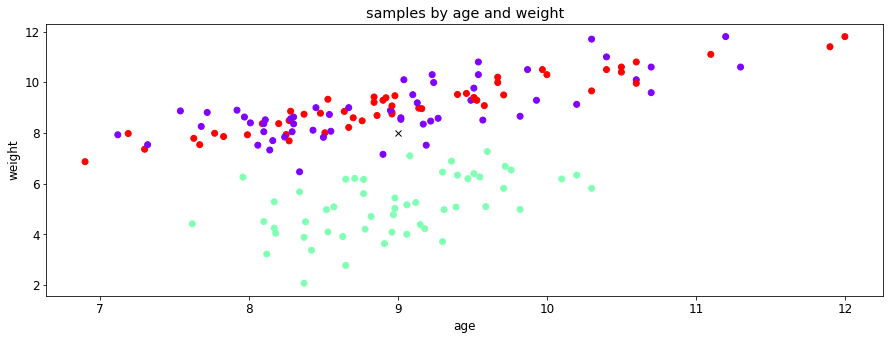

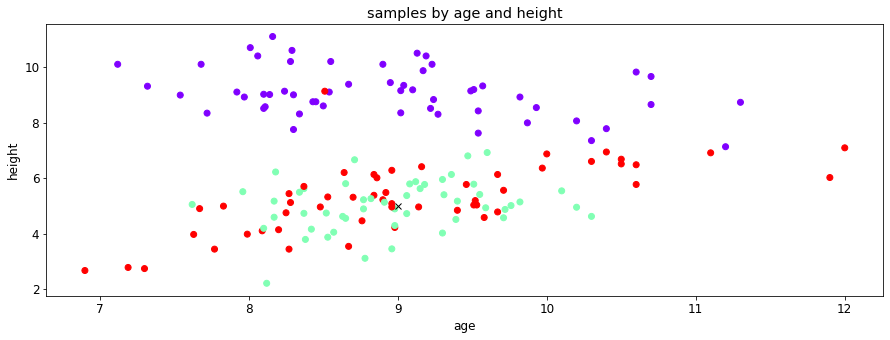

In [39]:
#look at where the new sample sits in comparison to the dataset
graph.plot(new_sample[0], new_sample[1], 'ko', marker='x')

graph.scatter(train_X[:,0], train_X[:,1], c = labels[:160])
graph.title('samples by age and weight')
graph.xlabel('age')
graph.ylabel('weight')
graph.show()

#plot out the age-height relationship 
graph.plot(new_sample[0], new_sample[2], 'ko', marker='x')

graph.scatter(train_X[:,0], train_X[:,2], c = labels[:160])
graph.title('samples by age and height')
graph.xlabel('age')
graph.ylabel('height')
graph.show()

In [41]:
predicted = model.predict(np.array([new_sample]))
print('Breed prediction for %s:' %(new_sample))


print(np.around(predicted[0],2))
print('Breed %s, with %i%% certainty.'%(np.argmax(predicted), np.around(100 * predicted[:, np.argmax(predicted)][0])))

#Breed 0 should be purple, breed 1 should be green, and breed 2 should be red                                                                                    


Breed prediction for [9, 8, 5]:
[0.04 0.02 0.94]
Breed 2, with 94% certainty.
